In [53]:
import pandas as pd
import numpy as np
import os
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hudsonshimanyula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hudsonshimanyula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:

#Get the News Articles
news_articles_dir = './BBC News Summary/News Articles'

news_articles = []

# Iterate through each category folder
for category in os.listdir(news_articles_dir):
    category_path = os.path.join(news_articles_dir, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            filepath = os.path.join(category_path, filename)
            with open(filepath, 'r', encoding='latin-1') as file:
                news_articles.append({'Category': category, 'Article': file.read()})
df_articles = pd.DataFrame(news_articles)
 #print all the categories
print(df_articles['Category'].unique())

#Get the Summaries
news_summaries_dir = './BBC News Summary/Summaries'
news_summaries = []
for category in os.listdir(news_summaries_dir):
    category_path = os.path.join(news_summaries_dir, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            filepath = os.path.join(category_path, filename)
            with open(filepath, 'r', encoding='latin-1') as file:
                news_summaries.append({'Category': category, 'Summary': file.read()})
df_summaries = pd.DataFrame(news_summaries)

['entertainment' 'business' 'sport' 'politics' 'tech']


In [55]:
#Preprocess the text data (remove stopwords, punctuation, lowercase, etc.).
def preprocess_text(text):

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert words to lower case and split them
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Remove words with length less than 3
    filtered_text = [word for word in filtered_text if len(word) >= 3]

    # Join all
    text = " ".join(filtered_text)

    return text



In [56]:
# Step 2: Preprocess Articles
df_articles['Article'] = df_articles['Article'].apply(preprocess_text)

# Step 3: Setup data
X = df_articles['Article']
y = df_articles['Category']

# Encode y labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Vectorize Data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 6: Train SVM
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Step 7: Predict and Evaluate
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute multi-class AUC-ROC using OvR
y_prob = svm_classifier.predict_proba(X_test_tfidf)  # Use predicted probabilities
auc_roc = roc_auc_score(y_test, y_prob, multi_class="ovr")

# Display results
print("Results using TF-IDF Vectorization and Support Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC (OvR):", auc_roc)

Results using TF-IDF Vectorization and Support Vector Machine (SVM) Classifier:
Accuracy: 0.9842696629213483
Precision: 0.9845782385373665
Recall: 0.9842696629213483
F1 Score: 0.9843197987476725
AUC-ROC (OvR): 0.9994702476006708


In [57]:
#do the same for summaries
# Step 2: Preprocess Articles
df_summaries['Summary'] = df_summaries['Summary'].apply(preprocess_text)

# Step 3: Setup data
X = df_summaries['Summary']
y = df_summaries['Category']

# Encode y labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Vectorize Data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 6: Train SVM
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Step 7: Predict and Evaluate
y_pred = svm_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute multi-class AUC-ROC using OvR
y_prob = svm_classifier.predict_proba(X_test_tfidf)  # Use predicted probabilities
auc_roc = roc_auc_score(y_test, y_prob, multi_class="ovr")

# Display results
print("Results using TF-IDF Vectorization and Support Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC (OvR):", auc_roc)



Results using TF-IDF Vectorization and Support Vector Machine (SVM) Classifier:
Accuracy: 0.9662921348314607
Precision: 0.9674999110095097
Recall: 0.9662921348314607
F1 Score: 0.9664494627146266
AUC-ROC (OvR): 0.9978854368784262


In [58]:
#try different classifiers
def evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1



In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier())
]

for name, clf in classifiers:
    accuracy, precision, recall, f1 = evaluate_classifier(clf, X_train_tfidf, X_test_tfidf, y_train, y_test)
    print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


Naive Bayes - Accuracy: 0.9483146067415731, Precision: 0.9506194915535394, Recall: 0.9483146067415731, F1-Score: 0.9477669300550646
Random Forest - Accuracy: 0.9370786516853933, Precision: 0.9383546136169229, Recall: 0.9370786516853933, F1-Score: 0.9369976873990508


In [60]:
# hyperparameter tuning
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), parameters, cv=5)
grid_search.fit(X_train_tfidf, y_train)

best_clf = grid_search.best_estimator_



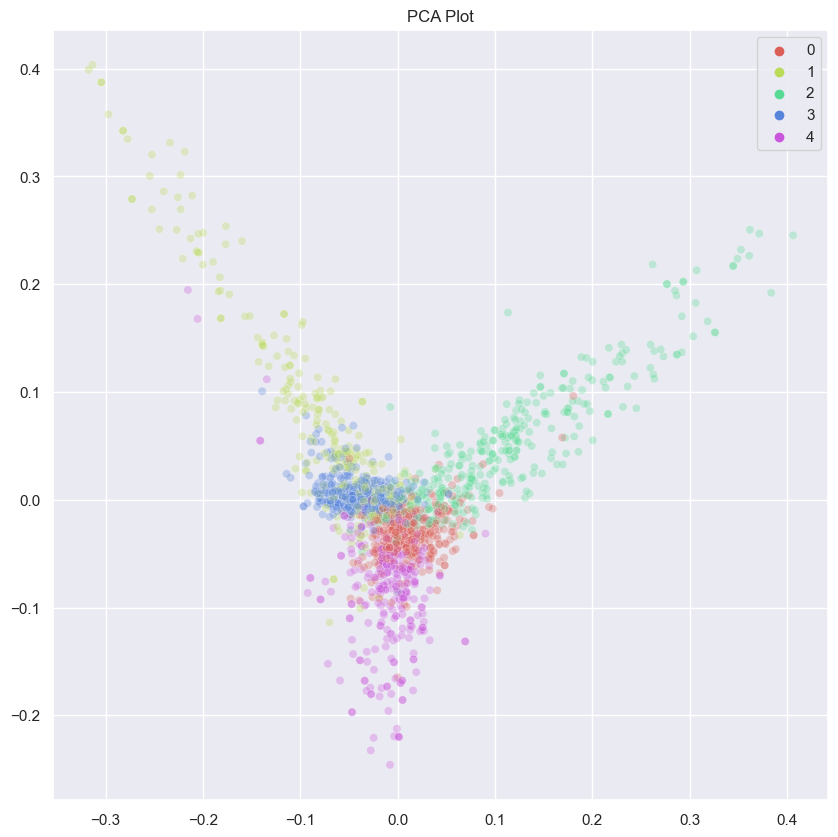

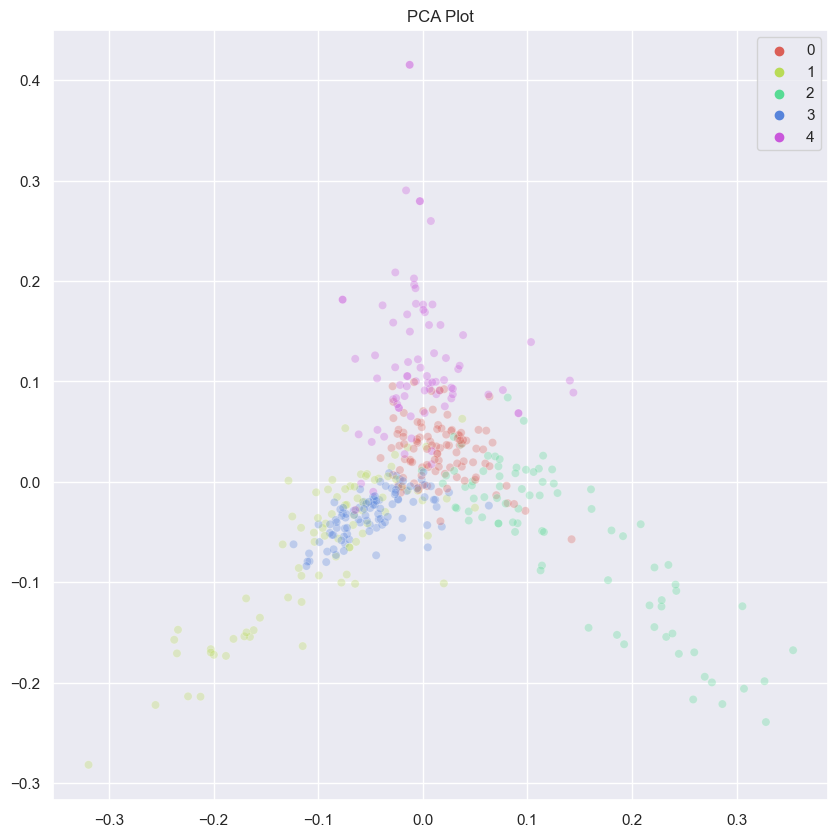

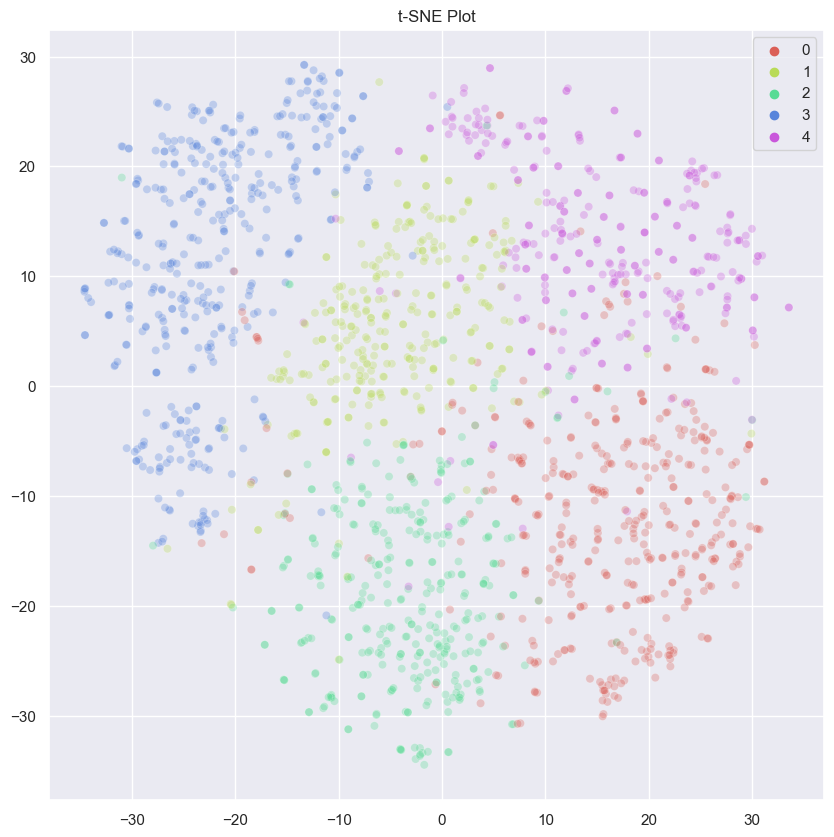

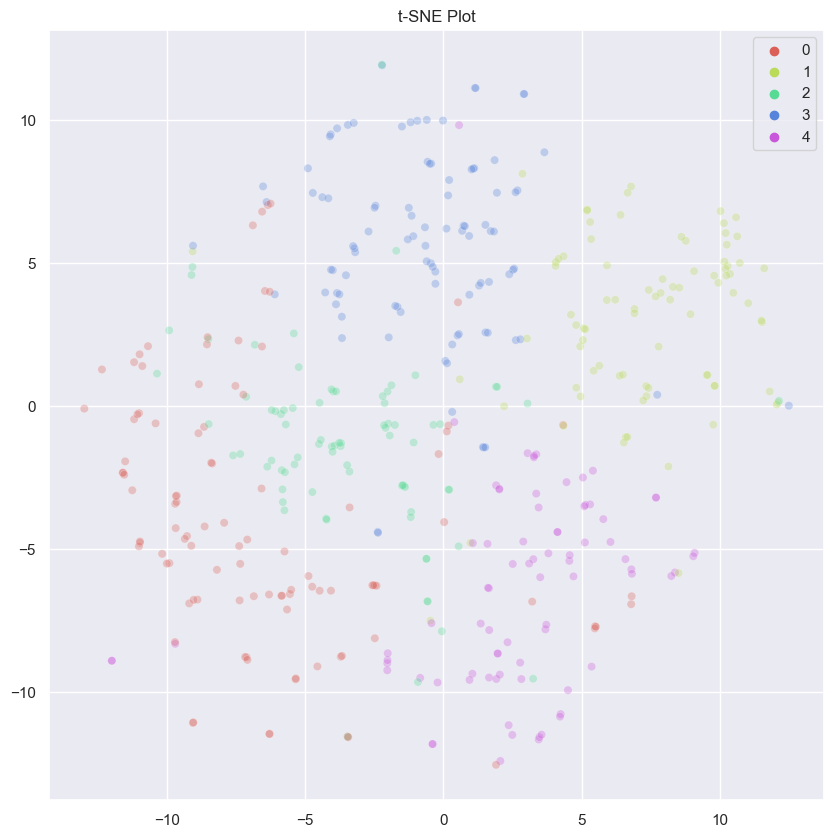

In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def plot_embeddings(X, y, method="PCA"):
    # Convert sparse matrix to dense array
    X_array = np.asarray(X.todense())
    
    if method == "PCA":
        reducer = PCA(n_components=2)
    elif method == "t-SNE":
        reducer = TSNE(n_components=2, perplexity=30, n_iter=300)
    else:
        raise ValueError("Invalid method provided. Choose 'PCA' or 't-SNE'.")
        
    reduced_result = reducer.fit_transform(X_array)
    
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        x=reduced_result[:, 0], y=reduced_result[:, 1],
        hue=y,
        palette=sns.color_palette("hls", len(np.unique(y))),
        legend="full",
        alpha=0.3
    )
    plt.title(f"{method} Plot")
    plt.show()

# Plotting PCA for articles
plot_embeddings(X_train_tfidf, y_train, method="PCA")
plot_embeddings(X_test_tfidf, y_test, method="PCA")

# Plotting t-SNE for articles
plot_embeddings(X_train_tfidf, y_train, method="t-SNE")
plot_embeddings(X_test_tfidf, y_test, method="t-SNE")


